Tweets sobre Apple

Este conjunto de datos hace parte del documento publicado en la Conferencia Internacional IEEE 2020 sobre Big Data en el marco de la sexta sesión especial sobre minería de datos [ver articulo](https://ieeexplore.ieee.org/document/9378170), se crea para determinar posibles especuladores e influencers en un mercado de valores. 

Algunas de las preguntas (tareas) interesantes que se pueden realizar en este conjunto de datos:

1. Determinar la correlación entre el valor de mercado de la empresa con respecto a la opinión pública de esa empresa.
2. Análisis de sentimiento de las empresas con una serie de tiempo en un gráfico y razonando las posibles subidas y bajadas.
3. Evaluar a los usuarios de trolls que intentan ocupar la agenda social.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Tweet_all_AAPL = pd.read_csv('/content/drive/Shareddrives/Data Minning - Natural Language Procesing/Datos_Sentimiento/Tweet_all_AAPL.csv',sep=';',header=0)
Tweet_all_AAPL.post_date = pd.to_datetime(Tweet_all_AAPL.post_date)
Tweet_all_AAPL['retweetXcal'] = Tweet_all_AAPL.retweet_num*Tweet_all_AAPL.Calificacion_ajus

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
fin = pd.read_csv('/content/drive/Shareddrives/Data Minning - Natural Language Procesing/Datos_Sentimiento/AAPL_fin_2.csv',sep=';',header=0)
fin[fin.retweetXcal.isnull()] = fin[fin.retweetXcal.isnull()].fillna(0)

{'boxes': [<matplotlib.lines.Line2D at 0x7fee6f788490>],
 'caps': [<matplotlib.lines.Line2D at 0x7fee6fac9b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fee6f6c4a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fee6f6c4ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fee6f6b1dd0>,
  <matplotlib.lines.Line2D at 0x7fee6f6e9910>]}

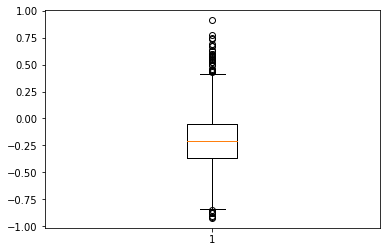

In [ ]:
plt.boxplot(fin.retweetXcal)

In [ ]:
Tweet_all_AAPL.Ind_positivo

0          0.0
1          0.0
2          0.0
3          0.0
4          1.0
          ... 
1423997    0.0
1423998    0.0
1423999    0.0
1424000    1.0
1424001    0.0
Name: Ind_positivo, Length: 1424002, dtype: float64

In [ ]:
Tweet_all_AAPL.retweet_num.describe()

count    1.424000e+06
mean     5.069438e-01
std      7.137807e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.990000e+02
Name: retweet_num, dtype: float64

In [ ]:
# Numero de tweets según clasificación
# Calificacion=label_1*ind_1+label_4*ind_4;   
Tweet_all_AAPL.groupby('Calificacion')['tweet_id'].count()

Calificacion
-2.0    128501
-1.5       947
-1.0    633928
-0.5       632
 0.0    302604
 0.5       790
 1.0    233120
 1.5      4148
 2.0    119332
Name: tweet_id, dtype: int64

In [ ]:
Tweet_all_AAPL.groupby('Label_1')['tweet_id'].count()

Label_1
-1.0    971448
 1.0    452553
Name: tweet_id, dtype: int64

In [ ]:
Tweet_all_AAPL.groupby('Label_4')['tweet_id'].count()

Label_4
-1.0    418415
-0.5     71235
 0.0    152993
 0.5    143279
 1.0    638079
Name: tweet_id, dtype: int64

In [ ]:
# retweets por tweet
writer_retweet = (Tweet_all_AAPL.groupby('writer')['retweet_num'].sum()/Tweet_all_AAPL.groupby('writer')['retweet_num'].count()).sort_values(ascending=False)
# likes por tweet
writer_like = (Tweet_all_AAPL.groupby('writer')['like_num'].sum()/Tweet_all_AAPL.groupby('writer')['like_num'].count()).sort_values(ascending=False)
# likes por tweet
writer_count = Tweet_all_AAPL.groupby('writer')['like_num'].count().sort_values(ascending=False)

In [ ]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   post_date     1253 non-null   object 
 1   numero        1253 non-null   int64  
 2   retweets      1253 non-null   float64
 3   likes         1253 non-null   float64
 4   positivo      1253 non-null   float64
 5   negativo      1253 non-null   float64
 6   dif_close     1253 non-null   float64
 7   Indicadora    1253 non-null   int64  
 8   dif_std       1253 non-null   float64
 9   Indicadora_2  1253 non-null   int64  
 10  retweetXcal   1252 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 107.8+ KB
